Drama 10.85
Adventure 25.10
Action 17.98
Comedy 7.22
Biography 2.59
Sci-Fi 10.77
Thriller 3.99
Romance 1.12
Animation 7.66
Crime 1.77
Mystery 1.95
Fantasy 4.54
History 0.72
Family 1.91
Music 0.15
Sport 0.46
War 0.36
Western 0.57
Horror 0.03
Musical 0.25


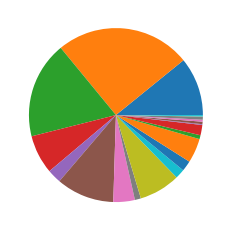

In [62]:
## Open and read data file as specified in the question
## Print the required output in given format
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

db = sqlite3.connect('IMDB.sqlite')

imdb = pd.read_sql_query('select * from IMDB', db)
earning = pd.read_sql_query('select * from earning', db)
genre = pd.read_sql_query('select * from genre', db)

df = earning.copy()
df['Total Earning'] = df['Domestic'] + df['Worldwide']

df1 = pd.merge(df, imdb, on = 'Movie_id', how = 'inner')
df2 = pd.merge(df1, genre, on = 'Movie_id', how = 'inner')
df2['Budget'] = df2['Budget'].replace('', 0)

df2['genre'].replace('', np.nan, inplace = True)
df2['genre'].dropna()

a = df2['genre'].value_counts().index
arr = []

a = list(a)


for i in a:
    
    b = df2.loc[df2['genre'] == i]
    c = b['Budget'].sum()
    arr.append(c)



for i in range(len(arr)):
    per = arr[i] / sum(arr) * 100
    print(a[i], format(per, '.2f'))
    
    

plt.pie(arr)
plt.show()

In [8]:
import sqlite3
import pandas as pd
db=sqlite3.connect('IMDB.sqlite')
df=pd.read_sql_query('Select genre.Movie_Id,genre.genre,IMDB.Movie_Id,IMDB.Budget from genre inner join IMDB on genre.Movie_Id=IMDB.Movie_Id',db)
df.Budget.replace('','0',inplace=True)
df=df[df.genre!='']
df=df[df.Budget!='']
df['Budget']=df['Budget'].astype(float)
#df.drop(df.index[df['genre'] == ''], inplace = True)
df.reset_index(drop=True,inplace=True)
df=df.groupby(["genre"]).agg({"Budget":"sum"})
sumbud=df.Budget.sum()
def f(s):
    return round((s*100)/sumbud,2)
df['Percent']=df.Budget.apply(f)
import matplotlib.pyplot as plt
plt.pie(df.Percent,labels=df.index,autopct=".%2f",startangle=90)
plt.show()
for i in range(0,len(df)):
    print(df.index[i],df.values[i][1])

,index,Movie_id,Domestic,Worldwide,total,Total Earning,Title,Rating,TotalVotes,MetaCritic,...,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS,genre
1,0,36809,56671993,187733202.0,244405195.0,244405195.0,12 Years a Slave (2013),8.1,496092,96,...,7.9,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0,Drama
5,1,30114,18335230,60738797.0,79074027.0,79074027.0,127 Hours (2010),7.6,297075,82,...,7.5,7.5,7.3,7.3,7.5,7.6,7.0,7.7,7.6,Drama
7,2,37367,35014192,39187783.0,74201975.0,74201975.0,50/50 (2011),7.7,283935,72,...,7.6,7.6,7.4,7.4,7.5,7.4,7.0,7.9,7.6,Drama
10,3,49473,15322921,87100449.0,102423370.0,102423370.0,About Time (2013),7.8,225412,,...,7.6,7.7,7.6,7.5,7.8,7.7,6.9,7.8,7.7,Drama
12,4,14867,6739492,19839492.0,26578984.0,26578984.0,Amour (2012),7.9,76121,94,...,7.7,7.9,7.9,7.8,8.1,6.6,7.2,7.9,7.8,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,104,32701,92186262,154026136.0,246212398.0,246212398.0,The Town (2010),7.6,297426,74,...,7.5,7.3,7.4,7.4,7.5,7.6,7.0,7.8,7.5,Drama
322,107,44316,171243005,252276927.0,423519932.0,423519932.0,True Grit (2010),7.6,257670,80,...,7.6,7.5,7.7,7.7,7.7,7.8,7.3,7.9,7.6,Drama
327,109,20709,22321,22321.0,44642.0,44642.0,Tyrannosaur (2011),7.6,26016,65,...,7.6,7.5,7.5,7.4,5.8,6.5,7.4,7.6,,Drama
331,110,17545,13657115,23057115.0,36714230.0,36714230.0,Warrior (2011),8.2,361049,71,...,8.0,8.0,7.7,7.7,7.5,7.8,7.1,8.2,8.1,Drama
